# Idea:

An implimentation of user segmentation (clustering) on drivers.

A) Examine variable importance (drivers) of cluster membership.

    0. Brand trust & love:
        - Q_Brand_Trust_Drivers. Transparent in its actions 
        - Q_Brand_Trust_Drivers. Ethical 
        - Q_Brand_Trust_Drivers. Respectful 
        - Q_Brand_Trust_Drivers. Honest 
        - Q_BrandxLove.(agree or disagree) [BRAND] is a brand I love

    1. Loyalty metrics: \['qxadvocacy01_1',	'qxadvocacy02_1',	
    'qxretention_1',	'qxenrichment_1']
        - Q_Advocacy01. likely to recommend  [MODEL] or another [BRAND] smartphone
        - Q_Advocacy02. likely to leave a positive online review for [MODEL]
        - Q_Retention.  likely to select [BRAND] the next time (smertphone) 
        - Q_Enrichment. likely to consider [BRAND] products (other electronic product)

    2. Usage variables: \[ 'qxtime',	
    'qxactivitiesxrecency_1 to qxactivitiesxrecency_25',	
    'qxcurrentxos',	'qxcurrentxstorage',	'qxcurrentxcarrier',	
    'qxunlocking',	'qxotherxdevices_1_1 to qxotherxdevices_9_6',	
    'qxpreviousxbrand',	'qxtransition_1',	'qxupgrade01_1 to qxupgrade01_9'\]
    
    3. Driver statements: \[ qxdrivers_1 to qxdrivers_34\]
    
    4. Total Quality Indicators	\[ qxoverallxqualityxindicators_1 to qxoverallxqualityxindicators_4\] : 
        - Q_Overall_Quality_Indicators. [Brand] is trustworthy 
        - Q_Overall_Quality_Indicators. When I use my [MODEL] , I feel good/positive 
        - Q_Overall_Quality_Indicators. My [MODEL]  meets my needs/ performs well 
        - Q_Overall_Quality_Indicators. My [MODEL]  is simple/easy to use 

B) Examine statistical significant differences in demographics amongst segments. 

    1. Demographic Columns \[ 'd1',	'd3_1',	'd3_2',	'd3_3',	'd3_4',	'd4', 'd6',	'd7_1',	'd7_2',	'd7_3',	'd7_4',	'd7_5',	'd7_97',	'd7_99',	'd7_97_other' \]
    -- convert d4[7] to dummy variable

C) Subsequently, we analyse difference between UX_index and UX_Loyalty for the clusters. We'll see a large difference in these two metrics for clusters which relationship between the quality indicators (feeling, trust, simplicity and function) and Loyalty differs. 

This will enable us to make infer things like:
Individuals who feel that ["Uing my [MODEL] doesn't require a lot of effort"] 


# Summary 

#### Usage Metrics
#### 3 clusters

### Important Features in Defining Cluster 2:
Variable	Label	imp_rank	imp	coefficient	coef_rank

qxotherxdevices_7_5	Home speakers - Other	(#1.0	0.049010)	(#3.0 +0.738909)

qxotherxdevices_9_5 Smart home system - Other (#8.0	0.024516])	(#1 +1.202069)

qxactivitiesxrecency_11	Searching (from the home screen) (#2.0	0.037769)	(#7 -0.607429)

<br>

### statistically significant differences in demographics between groups 
driven by **Usage Metrics** are in employment status. If the user is a student, they are most likely to be in cluster 0.  If the user is not currently employed or in school, they are most likely to be in cluster 0. If a user is employed, they are far more likely to be in cluster 2 than cluster 1.


# Housekeeping

In [2]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline 


# Seaborn visualization library
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

import scipy

In [3]:
pd.set_option('display.max_columns', 1000)
pd.options.display.max_rows=1000

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

plt.rcParams.update({'figure.max_open_warning': 0})


In [4]:
import random
random.seed( 0 )

# Load in Data

In [5]:
root = r"../data/input/07 Samsung UX Index - Web App Implementation/"

fname_data = root + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)

fname_vaxmap = root + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
# df_data.head(
df_data[[s for s in df_data.columns if "expectation" in s]].head()#.shape

,qxexpectations
0,4
1,5
2,6
3,5
4,4


# Modify d4 column

In [5]:
df_data['d4_X'] = np.where(df_data['d4']==7, '', df_data['d4'])
df_data['d4_7']  = np.where(df_data['d4']==7, df_data['d4'], '')

# Modify d1 column

In [6]:
df_data['d1_1'] = np.where(df_data['d1']==1, '', df_data['d1'])
df_data['d1_2']  = np.where(df_data['d1']==2, df_data['d1'], '')
df_data['d1_3'] = np.where(df_data['d1']==3, '', df_data['d1'])
df_data['d1_4']  = np.where(df_data['d1']==4, df_data['d1'], '')

# Usage Columns

In [17]:
lst = ['qxtime', 'qxcurrentxos',    'qxcurrentxstorage',    'qxcurrentxcarrier',    
        'qxunlocking',   'qxpreviousxbrand',    'qxtransition_1',]
lst.extend(['qxactivitiesxrecency_'+str(i+1) for i in range(25)])
lst.extend( ['qxupgrade01_'+str(i+1) for i in range(9)])

for s in ['qxotherxdevices_'+str(i+1) for i in range(9)]:
    lst.extend([s+"_"+str(i+1) for i in range(6)])
lst

['qxtime',
 'qxcurrentxos',
 'qxcurrentxstorage',
 'qxcurrentxcarrier',
 'qxunlocking',
 'qxpreviousxbrand',
 'qxtransition_1',
 'qxactivitiesxrecency_1',
 'qxactivitiesxrecency_2',
 'qxactivitiesxrecency_3',
 'qxactivitiesxrecency_4',
 'qxactivitiesxrecency_5',
 'qxactivitiesxrecency_6',
 'qxactivitiesxrecency_7',
 'qxactivitiesxrecency_8',
 'qxactivitiesxrecency_9',
 'qxactivitiesxrecency_10',
 'qxactivitiesxrecency_11',
 'qxactivitiesxrecency_12',
 'qxactivitiesxrecency_13',
 'qxactivitiesxrecency_14',
 'qxactivitiesxrecency_15',
 'qxactivitiesxrecency_16',
 'qxactivitiesxrecency_17',
 'qxactivitiesxrecency_18',
 'qxactivitiesxrecency_19',
 'qxactivitiesxrecency_20',
 'qxactivitiesxrecency_21',
 'qxactivitiesxrecency_22',
 'qxactivitiesxrecency_23',
 'qxactivitiesxrecency_24',
 'qxactivitiesxrecency_25',
 'qxupgrade01_1',
 'qxupgrade01_2',
 'qxupgrade01_3',
 'qxupgrade01_4',
 'qxupgrade01_5',
 'qxupgrade01_6',
 'qxupgrade01_7',
 'qxupgrade01_8',
 'qxupgrade01_9',
 'qxotherxdevices_1

In [18]:
qx_list = lst
print(len(qx_list))
qx_list


95


['qxtime',
 'qxcurrentxos',
 'qxcurrentxstorage',
 'qxcurrentxcarrier',
 'qxunlocking',
 'qxpreviousxbrand',
 'qxtransition_1',
 'qxactivitiesxrecency_1',
 'qxactivitiesxrecency_2',
 'qxactivitiesxrecency_3',
 'qxactivitiesxrecency_4',
 'qxactivitiesxrecency_5',
 'qxactivitiesxrecency_6',
 'qxactivitiesxrecency_7',
 'qxactivitiesxrecency_8',
 'qxactivitiesxrecency_9',
 'qxactivitiesxrecency_10',
 'qxactivitiesxrecency_11',
 'qxactivitiesxrecency_12',
 'qxactivitiesxrecency_13',
 'qxactivitiesxrecency_14',
 'qxactivitiesxrecency_15',
 'qxactivitiesxrecency_16',
 'qxactivitiesxrecency_17',
 'qxactivitiesxrecency_18',
 'qxactivitiesxrecency_19',
 'qxactivitiesxrecency_20',
 'qxactivitiesxrecency_21',
 'qxactivitiesxrecency_22',
 'qxactivitiesxrecency_23',
 'qxactivitiesxrecency_24',
 'qxactivitiesxrecency_25',
 'qxupgrade01_1',
 'qxupgrade01_2',
 'qxupgrade01_3',
 'qxupgrade01_4',
 'qxupgrade01_5',
 'qxupgrade01_6',
 'qxupgrade01_7',
 'qxupgrade01_8',
 'qxupgrade01_9',
 'qxotherxdevices_1

In [19]:
df_data_sub = df_data[qx_list]

In [20]:
# list non  integer columns  to be coerced into ints
coerce_cols = df_data_sub.dtypes[df_data_sub.dtypes!='int64'].index.to_list()
df_data_sub[coerce_cols] = df_data_sub[coerce_cols].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
# list all column types
print( np.unique( df_data_sub.columns))
print()
# confirm all are numeric types
print(np.unique(df_data_sub.dtypes.to_frame()[0].to_list()))
print()
print(df_data_sub.shape)
df_data_sub.describe()

['qxactivitiesxrecency_1' 'qxactivitiesxrecency_10'
 'qxactivitiesxrecency_11' 'qxactivitiesxrecency_12'
 'qxactivitiesxrecency_13' 'qxactivitiesxrecency_14'
 'qxactivitiesxrecency_15' 'qxactivitiesxrecency_16'
 'qxactivitiesxrecency_17' 'qxactivitiesxrecency_18'
 'qxactivitiesxrecency_19' 'qxactivitiesxrecency_2'
 'qxactivitiesxrecency_20' 'qxactivitiesxrecency_21'
 'qxactivitiesxrecency_22' 'qxactivitiesxrecency_23'
 'qxactivitiesxrecency_24' 'qxactivitiesxrecency_25'
 'qxactivitiesxrecency_3' 'qxactivitiesxrecency_4'
 'qxactivitiesxrecency_5' 'qxactivitiesxrecency_6'
 'qxactivitiesxrecency_7' 'qxactivitiesxrecency_8'
 'qxactivitiesxrecency_9' 'qxcurrentxcarrier' 'qxcurrentxos'
 'qxcurrentxstorage' 'qxotherxdevices_1_1' 'qxotherxdevices_1_2'
 'qxotherxdevices_1_3' 'qxotherxdevices_1_4' 'qxotherxdevices_1_5'
 'qxotherxdevices_1_6' 'qxotherxdevices_2_1' 'qxotherxdevices_2_2'
 'qxotherxdevices_2_3' 'qxotherxdevices_2_4' 'qxotherxdevices_2_5'
 'qxotherxdevices_2_6' 'qxotherxdevices_3_1' 

,qxtime,qxcurrentxos,qxcurrentxstorage,qxcurrentxcarrier,qxunlocking,qxpreviousxbrand,qxtransition_1,qxactivitiesxrecency_1,qxactivitiesxrecency_2,qxactivitiesxrecency_3,qxactivitiesxrecency_4,qxactivitiesxrecency_5,qxactivitiesxrecency_6,qxactivitiesxrecency_7,qxactivitiesxrecency_8,qxactivitiesxrecency_9,qxactivitiesxrecency_10,qxactivitiesxrecency_11,qxactivitiesxrecency_12,qxactivitiesxrecency_13,qxactivitiesxrecency_14,qxactivitiesxrecency_15,qxactivitiesxrecency_16,qxactivitiesxrecency_17,qxactivitiesxrecency_18,qxactivitiesxrecency_19,qxactivitiesxrecency_20,qxactivitiesxrecency_21,qxactivitiesxrecency_22,qxactivitiesxrecency_23,qxactivitiesxrecency_24,qxactivitiesxrecency_25,qxupgrade01_1,qxupgrade01_2,qxupgrade01_3,qxupgrade01_4,qxupgrade01_5,qxupgrade01_6,qxupgrade01_7,qxupgrade01_8,qxupgrade01_9,qxotherxdevices_1_1,qxotherxdevices_1_2,qxotherxdevices_1_3,qxotherxdevices_1_4,qxotherxdevices_1_5,qxotherxdevices_1_6,qxotherxdevices_2_1,qxotherxdevices_2_2,qxotherxdevices_2_3,qxotherxdevices_2_4,qxotherxdevices_2_5,qxotherxdevices_2_6,qxotherxdevices_3_1,qxotherxdevices_3_2,qxotherxdevices_3_3,qxotherxdevices_3_4,qxotherxdevices_3_5,qxotherxdevices_3_6,qxotherxdevices_4_1,qxotherxdevices_4_2,qxotherxdevices_4_3,qxotherxdevices_4_4,qxotherxdevices_4_5,qxotherxdevices_4_6,qxotherxdevices_5_1,qxotherxdevices_5_2,qxotherxdevices_5_3,qxotherxdevices_5_4,qxotherxdevices_5_5,qxotherxdevices_5_6,qxotherxdevices_6_1,qxotherxdevices_6_2,qxotherxdevices_6_3,qxotherxdevices_6_4,qxotherxdevices_6_5,qxotherxdevices_6_6,qxotherxdevices_7_1,qxotherxdevices_7_2,qxotherxdevices_7_3,qxotherxdevices_7_4,qxotherxdevices_7_5,qxotherxdevices_7_6,qxotherxdevices_8_1,qxotherxdevices_8_2,qxotherxdevices_8_3,qxotherxdevices_8_4,qxotherxdevices_8_5,qxotherxdevices_8_6,qxotherxdevices_9_1,qxotherxdevices_9_2,qxotherxdevices_9_3,qxotherxdevices_9_4,qxotherxdevices_9_5,qxotherxdevices_9_6
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3133.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.00000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000,3254.00000
mean,4.086355,23.974186,3.368470,2.960049,3.946220,2.893977,5.776891,1.668101,1.344499,3.934849,1.660725,1.648740,3.484634,2.851875,1.789490,2.991088,2.838045,2.749232,2.313460,1.677628,1.275661,1.760295,2.080516,2.280885,2.819914,2.122618,2.084819,4.454210,3.135526,4.748617,3.881684,5.747081,0.295636,0.221881,0.27689,0.418254,0.116779,0.313153,0.180086,0.231100,0.119852,0.312231,0.044253,0.046404,0.214198,0.178242,0.256607,0.245851,0.045175,0.040873,0.102028,0.468654,0.130301,0.036570,0.018746,0.212969,0.376460,0.374923,0.070990,0.050092,0.027658,0.036263,0.094038,0.376152,0.436386,0.175169,0.030117,0.029809,0.087892,0.116165,0.576214,0.055009,0.161955,0.031961,0.058390,0.189920,0.528888,0.044253,0.069146,0.067609,0.107253,0.274124,0.460049,0.030731,0.029809,0.179471,0.205286,0.445298,0.243085,0.044561,0.058082,0.055624,0.085741,0.162262,0.64413
std,1.428137,37.393858,1.685657,1.356838,2.031839,2.742478,1.327219,1.220728,1.062570,2.099301,1.63

In [22]:
# Count Na values
df_data_sub.isna().sum()[df_data_sub.isna().sum()>0].sort_values(ascending=False)

qxtransition_1    121
dtype: int64

In [23]:
# drop columns where are values are missing 
# qxactivitiesxdrivers_2_1
cols_allmissing = df_data_sub.isna().sum()[df_data_sub.isna().sum()==3254].index.to_list()
print(cols_allmissing)
print(df_data_sub.shape)
df_data_sub = df_data_sub.drop(cols_allmissing, axis = 1) 
print(df_data_sub.shape)

[]
(3254, 95)
(3254, 95)


In [24]:
# Standardize the qx_list columns
scaler = StandardScaler().fit(df_data_sub)
df_data_sub_std = df_data_sub.copy()
df_data_sub_std[df_data_sub.columns] = scaler.transform(df_data_sub)
df_data_sub_std.describe()

,qxtime,qxcurrentxos,qxcurrentxstorage,qxcurrentxcarrier,qxunlocking,qxpreviousxbrand,qxtransition_1,qxactivitiesxrecency_1,qxactivitiesxrecency_2,qxactivitiesxrecency_3,qxactivitiesxrecency_4,qxactivitiesxrecency_5,qxactivitiesxrecency_6,qxactivitiesxrecency_7,qxactivitiesxrecency_8,qxactivitiesxrecency_9,qxactivitiesxrecency_10,qxactivitiesxrecency_11,qxactivitiesxrecency_12,qxactivitiesxrecency_13,qxactivitiesxrecency_14,qxactivitiesxrecency_15,qxactivitiesxrecency_16,qxactivitiesxrecency_17,qxactivitiesxrecency_18,qxactivitiesxrecency_19,qxactivitiesxrecency_20,qxactivitiesxrecency_21,qxactivitiesxrecency_22,qxactivitiesxrecency_23,qxactivitiesxrecency_24,qxactivitiesxrecency_25,qxupgrade01_1,qxupgrade01_2,qxupgrade01_3,qxupgrade01_4,qxupgrade01_5,qxupgrade01_6,qxupgrade01_7,qxupgrade01_8,qxupgrade01_9,qxotherxdevices_1_1,qxotherxdevices_1_2,qxotherxdevices_1_3,qxotherxdevices_1_4,qxotherxdevices_1_5,qxotherxdevices_1_6,qxotherxdevices_2_1,qxotherxdevices_2_2,qxotherxdevices_2_3,qxotherxdevices_2_4,qxotherxdevices_2_5,qxotherxdevices_2_6,qxotherxdevices_3_1,qxotherxdevices_3_2,qxotherxdevices_3_3,qxotherxdevices_3_4,qxotherxdevices_3_5,qxotherxdevices_3_6,qxotherxdevices_4_1,qxotherxdevices_4_2,qxotherxdevices_4_3,qxotherxdevices_4_4,qxotherxdevices_4_5,qxotherxdevices_4_6,qxotherxdevices_5_1,qxotherxdevices_5_2,qxotherxdevices_5_3,qxotherxdevices_5_4,qxotherxdevices_5_5,qxotherxdevices_5_6,qxotherxdevices_6_1,qxotherxdevices_6_2,qxotherxdevices_6_3,qxotherxdevices_6_4,qxotherxdevices_6_5,qxotherxdevices_6_6,qxotherxdevices_7_1,qxotherxdevices_7_2,qxotherxdevices_7_3,qxotherxdevices_7_4,qxotherxdevices_7_5,qxotherxdevices_7_6,qxotherxdevices_8_1,qxotherxdevices_8_2,qxotherxdevices_8_3,qxotherxdevices_8_4,qxotherxdevices_8_5,qxotherxdevices_8_6,qxotherxdevices_9_1,qxotherxdevices_9_2,qxotherxdevices_9_3,qxotherxdevices_9_4,qxotherxdevices_9_5,qxotherxdevices_9_6
count,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.133000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03,3.254000e+03
mean,4.367196e-17,8.734391e-18,1.222815e-16,-8.734391e-18,-1.353831e-16,6.114074e-17,8.164551e-17,-7.642592e-17,4.367196e-17,5.240635e-17,-7.860952e-17,-8.734391e-18,3.493757e-17,-1.397503e-16,8.734391e-17,-1.452093e-16,9.171111e-17,-1.746878e-17,-2.183598e-17,1.200979e-16,1.179143e-16,-4.367196e-17,-1.266487e-16,1.091799e-17,7.642592e-17,1.026291e-16,3.930476e-17,-1.572190e-16,8.734391e-18,9.607830e-17,3.493757e-17,8.734391e-18,-1.168225e-16,6.987513e-17,2.183598e-17,-6.332434e-17,9.280291e-18,1.222815e-16,-2.183598e-17,-7.642592e-17,5.240635e-17,-3.493757e-17,-3.493757e-17,-1.310159e-17,1.746878e-17,-2.620317e-17,-5.677354e-17,-5.458995e-17,6.004894e-17,4.367196e-17,2.183598e-18,4.803915e-17,-1.528518e-17,2.183598e-18,-1.310159e-17,2.620317e-17,-5.240635e-17,1.222815e-16,2.893267e-17,-1.310159e-17,2.620317e-17,1.746878e-17,1.746878e-17,-2.620317e-

In [25]:
# Count all Na values, now that they're scaled... 
# did scaling generate nans for columns with *some* missing values? NO
df_data_sub_std.isna().sum()[df_data_sub_std.isna().sum()>0].sort_values(ascending=False)

qxtransition_1    121
dtype: int64

In [26]:
# fill NA's with 0
df_data_sub_std.fillna(0, inplace=True)

In [27]:
# Count Na values... should totall to 0 across the board
sum(df_data_sub_std.isna().sum()[df_data_sub.isna().sum()>0])

0

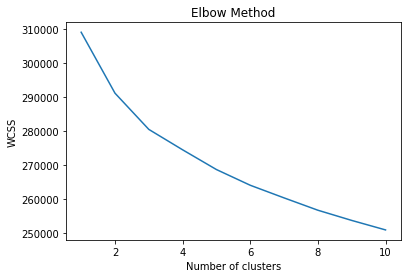

In [28]:
# Using WCSS-based (sum of dists b/w centroids & points for all clusters)...
# ... Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_data_sub_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Fitting KMeans w/ Optimal number of Clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_data_sub_std)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


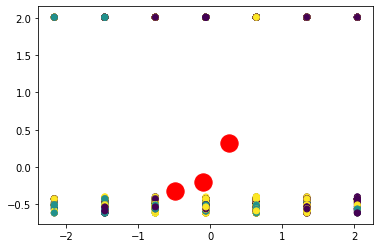

In [30]:
plt.scatter(df_data_sub_std.ix[:,0], df_data_sub_std.ix[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [31]:
df_data_sub_std['pred'] = pred_y
df_data_sub_std.groupby('pred').describe()

qxtime                                                                       qxcurrentxos                                                                       qxcurrentxstorage                                                                       qxcurrentxcarrier                                                                      qxunlocking                                                                       qxpreviousxbrand                                                                       qxtransition_1                                                                       qxactivitiesxrecency_1                                                                       qxactivitiesxrecency_2                                                                       qxactivitiesxrecency_3                                                                       qxactivitiesxrecency_4                                                                       qxactivitiesxrecency_5  \
       count      mean       std       min       25%       50%       75%       max        count      mean       std       min       25%       50%       75%       max             count      mean       std       min       25%       50%       75%       max             count      mean       std       min       25%       50%       75%      max       count      mean       std       min       25%       50%       75%       max            count      mean       std       min       25%       50%       75%       max          count      mean       std       min       25%       50%       75%       max                  count      mean       std       min       25%       50%       75%       max                  count      mean       std       min       25%       50%       75%       max                  count      mean       std       min       25%       50%       75%       max                  count      mean       std       min       25%       50%       75%       max                  count   
pred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
0     1332.0  0.263396  1.015591 -2.161439 -0.060476  0.639844  0.639844  2.040486       1332.0  0.327612  1.172618 -0.614478 -0.507492 -0.427253  2.006676  2.006676            1332.0  0.096304  1.185296 -1.405288 -0.811956 -0.218625  0.374707  2.154702            1332.0  0.125186  1.023184 -1.444793 -0.707672  0.766569  0.766569  1.50369      1332.0  0.114056  1.194424 -1.450249 -0.958008  0.026473  0.026473  2.487676           1332.0 -0.011986  1.020949 -0.690714 -0.690714 -0.326024  0.038666  3.320873         1332.0 -0.063167  1.068237 -3.599749 -0.585446  0.168129  0.921705  0.921705                 1332.0  0.326056  1.254035 -0.547381 -0.547381  0.271928  0.271928  6.007090                 1332.0  0.052382  1.178844 -0.324263 -0.324263 -0.324263 -0.324263  7.205809                 1332.0  0.508534  0.967144 -1.398227 -0.445383  0.983883  1.460306  2.413150                 1332.0  0.228842  1.288433 -0.403678 -0.403678 -0.403678 -0.403678  4.484019                 1332.0   
1      391.0 -0.486759  0.948325 -

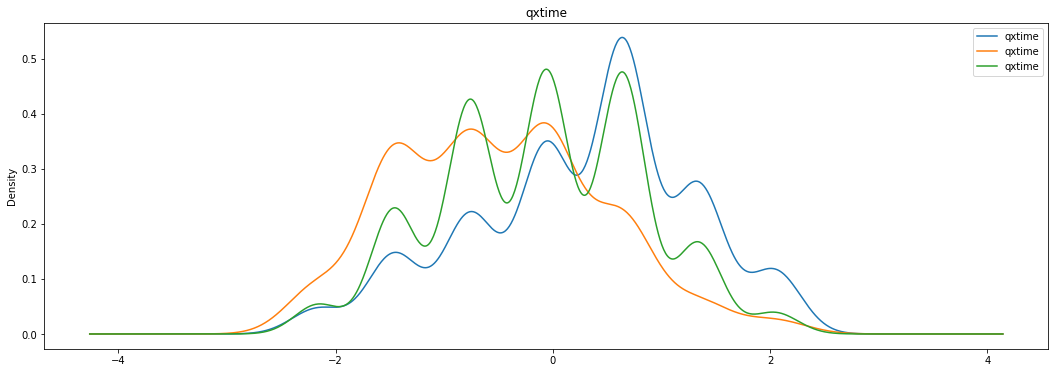

In [32]:
fig, ax = plt.subplots(figsize=(18,6))
  
for name, group in df_data_sub_std.groupby('pred'):
    group[qx_list[0]].plot( kind='kde', ax=ax, title=qx_list[0], legend=True)

plt.show()

# Save Each Plot to PDF 

LinAlgError: singular matrix

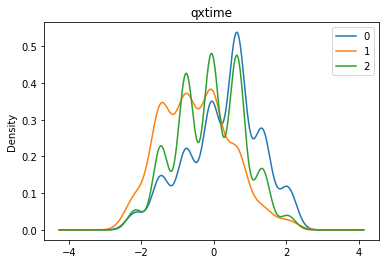

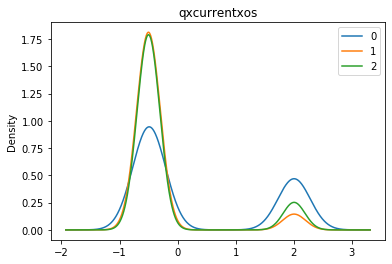

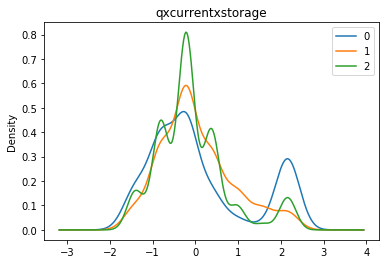

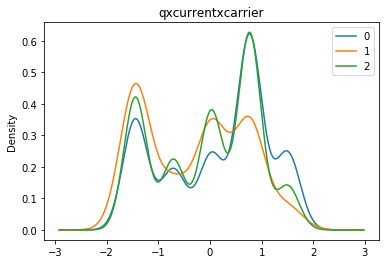

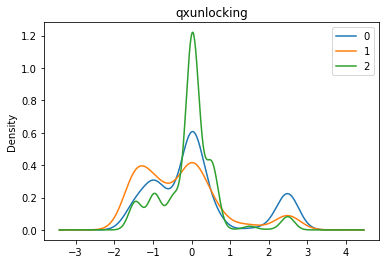

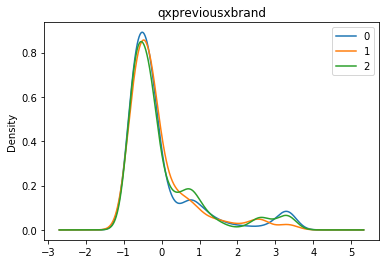

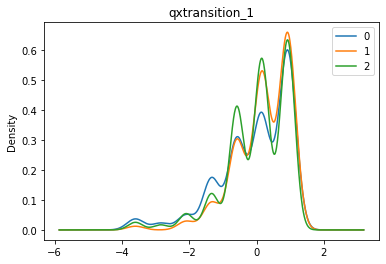

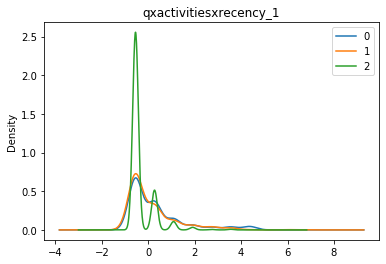

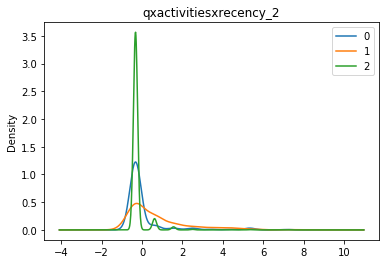

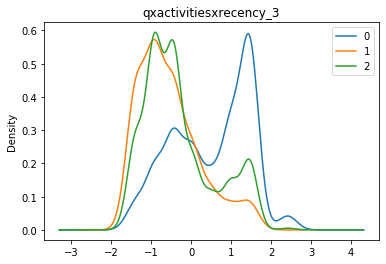

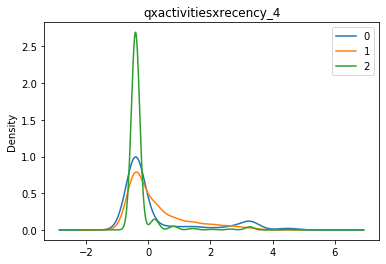

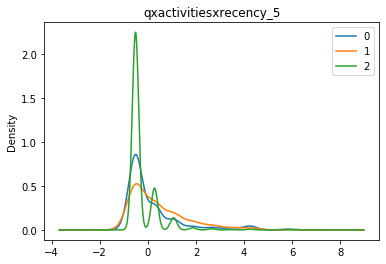

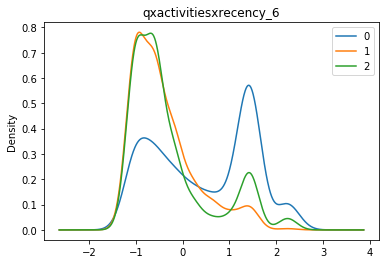

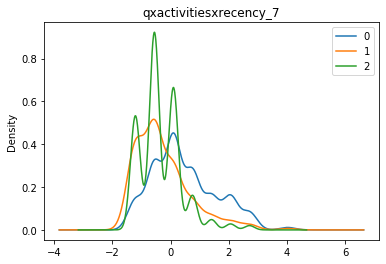

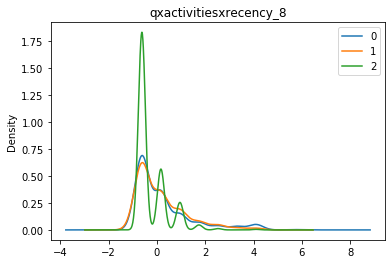

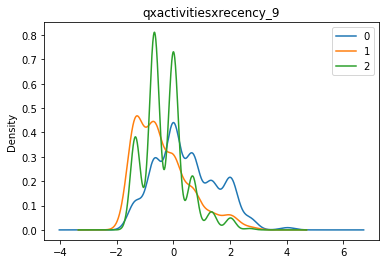

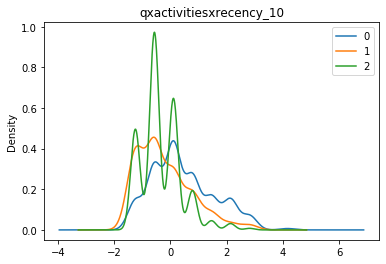

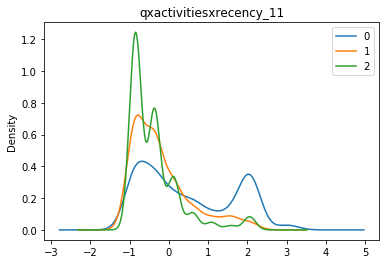

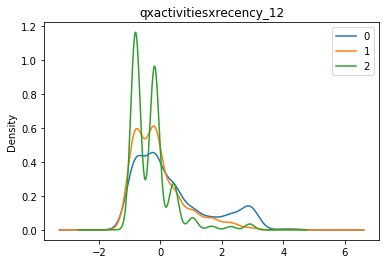

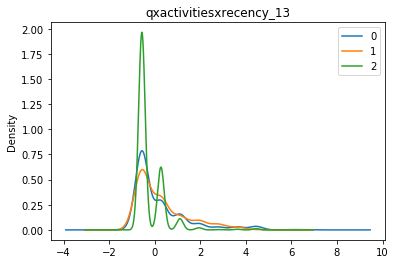

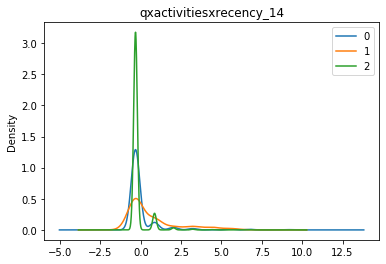

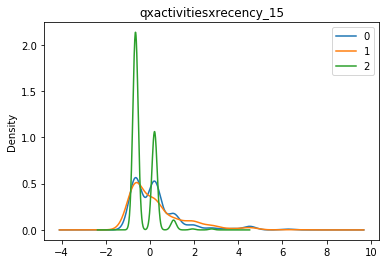

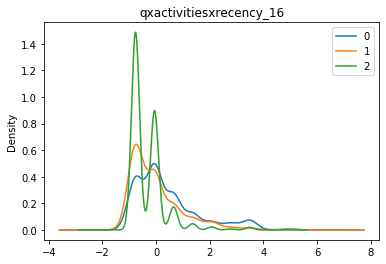

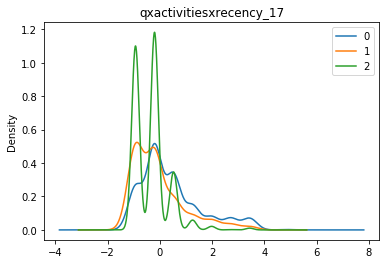

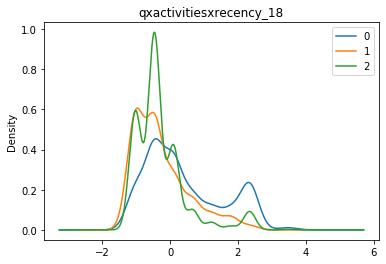

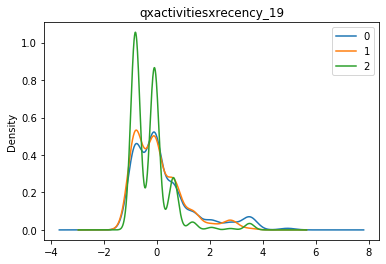

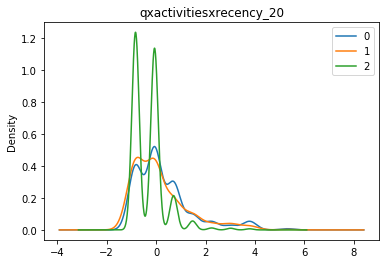

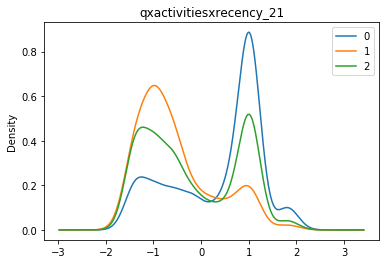

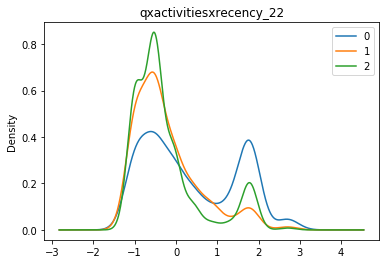

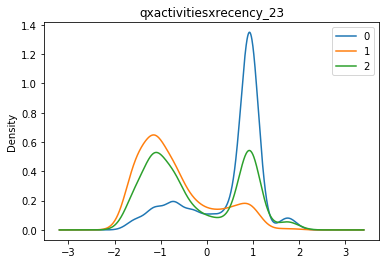

Error in callback <function flush_figures at 0x118553268> (for post_execute):


KeyboardInterrupt: 

In [118]:
with PdfPages('../data/output/Seg1_KNN3_byusage.pdf') as pdf:
    plt.ioff()
    for col in df_data_sub_std.columns.drop(['pred']):
        plt.figure()
        fig=df_data_sub_std.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
        pdf.savefig(fig)


# Variable Importance - Cluster 2

In [43]:
df_data_sub_std['pred_2'] = np.where(df_data_sub_std['pred']==2, 1, 0)

df_data_sub_std_vars=df_data_sub_std.columns.values.tolist()

y = df_data_sub_std['pred_2']

X = df_data_sub_std
X = X.drop(columns=['pred','pred_2'])

## Logistic Regression

In [44]:
m = LogisticRegression()
m.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# The estimated coefficients will all be around 1:
coefs = pd.DataFrame(list(zip(X.columns, m.coef_[0])))
coefs.columns = ['Variable', 'coefficient']
coefs = coefs.sort_values(['coefficient'], ascending=False)
coefs = coefs.merge(df_varmap[['Variable', 'Label']], on='Variable', how='left')
coefs.head(20)

,Variable,coefficient,Label
0,qxotherxdevices_9_5,1.202069,"Q_Other_Devices. Smart home system (smart lighting, smart fridge, smart toaster, etc.) - Other - What brands of the following devices do you own?"
1,qxotherxdevices_9_6,0.762712,"Q_Other_Devices. Smart home system (smart lighting, smart fridge, smart toaster, etc.) - Don’t own this device - What brands of the following devices do you own?"
2,qxotherxdevices_7_5,0.738909,Q_Other_Devices. Home speakers - Other - What brands of the following devices do you own?
3,qxotherxdevices_4_5,0.471661,Q_Other_Devices. Camera - Other - What brands of the following devices do you own?
4,qxupgrade01_4,0.286131,Q_Upgrade.01. Wanted a faster smartphone - What are the main reasons why you upgraded/purchased a new smartphone?
5,qxupgrade01_6,0.256865,Q_Upgrade.01. Wanted a better camera - What are the main reasons why you upgraded/purchased a new smartphone?
6,qxotherxdevices_5_5,0.227316,Q_Other_Devices. Smartwatch - Other - What brands of the following devices do you own?
7,qxotherxdevices_3_4,0.182338,Q_Other_Devices. TV - Samsung - What brands of the following devices do you own?
8,qxotherxdevices_9_2,0.157953,"Q_Other_Devices. Smart home system (smart lighting, smart fridge, smart toaster, etc.) - Google - What brands of the following devices do you own?"
9,qxotherxdevices_9_3,0.154613,"Q_Other_Devices. Smart home system (smart lighting, smart fridge, smart toaster, etc.) - LG - What brands of the following devices do you own?"


In [46]:
desc_df = df_data_sub_std.groupby('pred').describe()
desc_df = desc_df.unstack().reset_index()
desc_df.columns = ['Variable','Metric','pred','value']
desc_df.head()

,Variable,Metric,pred,value
0,qxtime,count,0,1332.000000
1,qxtime,count,1,391.000000
2,qxtime,count,2,1531.000000
3,qxtime,mean,0,0.263396
4,qxtime,mean,1,-0.486759


## RFE

In [47]:
# Identifying top 2 variables our of 4
model = LogisticRegression()
rfe_model = RFE(model, 2)
rfe_fit = rfe_model.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [48]:
# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(df_data_sub_std.columns[feature_list_index])

qxactivitiesxrecency_16
qxotherxdevices_7_5


## Random Forest

In [49]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)
 
# Fitting the classifier
rfc.fit(X, y)
 
# Printing the name of each feature along with the gini value
for feature in zip(df_data_sub_std.columns, rfc.feature_importances_):
    print(feature)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('qxtime', 0.013894593739025837)
('qxcurrentxos', 0.014539320163990907)
('qxcurrentxstorage', 0.014704269778022739)
('qxcurrentxcarrier', 0.010888068596909476)
('qxunlocking', 0.015716031477632376)
('qxpreviousxbrand', 0.008881819942416092)
('qxtransition_1', 0.010913161414571403)
('qxactivitiesxrecency_1', 0.022306270604485055)
('qxactivitiesxrecency_2', 0.011206895439617452)
('qxactivitiesxrecency_3', 0.03363862347973774)
('qxactivitiesxrecency_4', 0.025199087497331452)
('qxactivitiesxrecency_5', 0.012912167691488933)
('qxactivitiesxrecency_6', 0.029438979936784692)
('qxactivitiesxrecency_7', 0.02042846769331757)
('qxactivitiesxrecency_8', 0.009234704198399103)
('qxactivitiesxrecency_9', 0.02345934470829869)
('qxactivitiesxrecency_10', 0.032012530394599246)
('qxactivitiesxrecency_11', 0.03776935675385048)
('qxactivitiesxrecency_12', 0.0183382054999533)
('qxactivitiesxrecency_13', 0.0098372094904171)
('qxactivitiesxrecency_14', 0.004034947524747885)
('qxactivitiesxrecency_15', 0.01790

In [50]:
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.15)
sfm.fit(X, y)
 
# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(df_data_sub_std.columns[feature_list_index])

## Extra Trees

In [106]:
# from sklearn.ensemble import ExtraTreesClassifier
 
# # fit an Extra Trees model to the data
# etc = ExtraTreesClassifier()
# etc.fit(X, y)
 
# # Finally selecting the most important features
# sfm = SelectFromModel(etc, threshold=0.15)
# sfm.fit(X, y)
    
# getting the score by relative importance of each attribute
# Printing the name of each feature along with the gini value


In [116]:
varimp = pd.DataFrame({'Variable':df_data_sub_std.columns.drop('pred').drop('pred_2'),
              'imp': list(rfc.feature_importances_)}).sort_values('imp', ascending=False)

varimp = varimp.merge(df_varmap[['Variable', 'Label']], 
                      on='Variable', how='left')


varimp = varimp.merge(coefs[['Variable','coefficient']], on='Variable', how='left')

varimp['imp_rank'] = varimp['imp'].rank(ascending=False)
varimp['coef_rank'] = [abs(x) for x in varimp['coefficient']]
varimp['coef_rank'] = varimp['coef_rank'].rank(ascending=False)

varimp = varimp[['Variable','Label','imp_rank','imp','coefficient','coef_rank']]

varimp[varimp.imp_rank<10].sort_values('coefficient',ascending=True)

,Variable,Label,imp_rank,imp,coefficient,coef_rank
1,qxactivitiesxrecency_11,"Q_Activities_Recency. Searching for something on your smartphone (from the home screen) - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consid",2.0,0.037769,-0.607429,7.0
5,qxactivitiesxrecency_6,"Q_Activities_Recency. Setting up multiple windows / split screen - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experience with",6.0,0.029439,-0.525517,11.0
6,qxactivitiesxrecency_4,"Q_Activities_Recency. Unlocking the smartphone (e.g., via password, fingerprint, facial or voice recognition) - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps on",7.0,0.025199,-0.415270,19.0
4,qxactivitiesxrecency_10,"Q_Activities_Recency. Setting up and managing notifications - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experience with alte",5.0,0.032013,-0.371197,26.0
2,qxactivitiesxrecency_3,"Q_Activities_Recency. Transferring files from smartphone to a computer - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experienc",3.0,0.033639,-0.359943,28.0
3,qxotherxdevices_7_6,Q_Other_Devices. Home speakers - Don’t own this device - What brands of the following devices do you own?,4.0,0.032453,-0.261932,38.0
8,qxactivitiesxrecency_9,"Q_Activities_Recency. Customizing settings (e.g., changing wallpaper, changing security/privacy requirements, etc.) - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer a",9.0,0.023459,-0.209695,49.0
0,qxotherxdevices_7_5,Q_Other_Devices. Home speakers - Other - What brands of the following devices do you own?,1.0,0.049010,0.738909,3.0
7,qxotherxdevices_9_5,"Q_Other_Devices. Smart home system (smart lighting, smart fridge, smart toaster, etc.) - Other - What brands of the following devices do you own?",8.0,0.024516,1.202069,1.0


# Examine statistical significant differences in demographics amongst segments. 

In [75]:
df_data['pred'] = pred_y

In [76]:
# get columns not in df_data_sub_std
att_cols = [ 'd1_1', 'd1_2', 'd1_3', 'd1_4', 
            'd3_1',	'd3_2',	'd3_3',	'd3_4',	'd4_X', 'd4_7', 'd6',
            'd7_1',	'd7_2',	'd7_3',	'd7_4',	'd7_5',	'd7_97',	'd7_99',
            'd7_97_other']
att_cols

['d1_1',
 'd1_2',
 'd1_3',
 'd1_4',
 'd3_1',
 'd3_2',
 'd3_3',
 'd3_4',
 'd4_X',
 'd4_7',
 'd6',
 'd7_1',
 'd7_2',
 'd7_3',
 'd7_4',
 'd7_5',
 'd7_97',
 'd7_99',
 'd7_97_other']

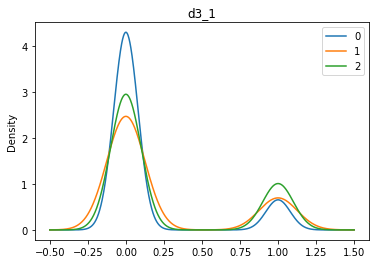

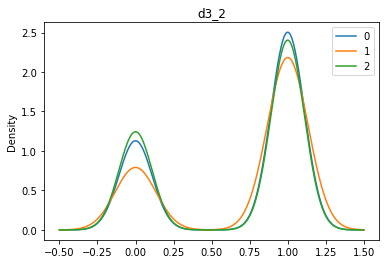

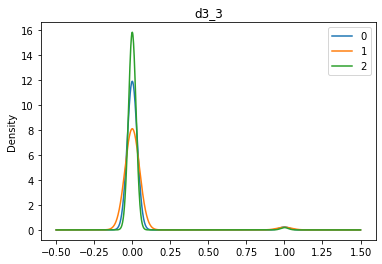

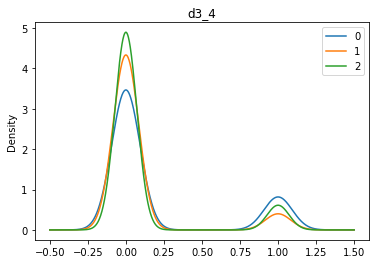

In [78]:
with PdfPages('../data/output/Seg1_KNN3_byusage_demog.pdf') as pdf:
    plt.ioff()
    for col in att_cols:
        if pd.api.types.is_numeric_dtype(df_data[col]):
            plt.figure()
            fig=df_data.groupby('pred')[col].plot(kind='kde', title=col, legend=True)[0].get_figure()
            pdf.savefig(fig)


In [79]:
# Testing whether the populations have statistically sig diff in means (assuming N distr)
# For two independent samples w/ potentially !=  variance, use Welch's t-test

# scipy.stats.ttest_ind(cat1['values'], cat2['values'], equal_var=False)

t_test_results = {}
for col in att_cols:
    if pd.api.types.is_numeric_dtype(df_data[col]):
        g0 = df_data.where(df_data.pred==0).dropna()[col]
        g1 = df_data.where(df_data.pred==1).dropna()[col]
        g2 = df_data.where(df_data.pred==2).dropna()[col]
        
        t_test_results[col+"_01"] = scipy.stats.ttest_ind(g0,g1, equal_var=False)
        t_test_results[col+"_02"] = scipy.stats.ttest_ind(g0,g2, equal_var=False)
        t_test_results[col+"_12"] = scipy.stats.ttest_ind(g1,g2, equal_var=False)

In [80]:
results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['statistic','pvalue']
results_df = results_df.sort_values('pvalue', ascending=True)

In [81]:
results_df.head(10)

,statistic,pvalue
d3_1_02,-8.501582,2.996604e-17
d3_4_01,5.911212,4.838940e-09
d3_4_02,5.858809,5.276009e-09
d3_1_01,-3.828122,1.439668e-04
d3_2_12,2.939751,3.404049e-03
d3_3_02,1.847260,6.483235e-02
d3_2_02,1.761931,7.819063e-02
d3_3_12,1.715478,8.690479e-02
d3_2_01,-1.700642,8.948083e-02
d3_4_12,-1.609801,1.079175e-01


In [82]:
results_df['Variable_Grp'] = results_df.index
results_df['Variable'] = results_df.Variable_Grp.replace("_01|_02|_12","", regex=True)
results_df_p01 = results_df[results_df.pvalue<=.01].merge(df_varmap[['Variable', 'Label']], 
                                         on='Variable', how='left')
results_df_p01

,statistic,pvalue,Variable_Grp,Variable,Label
0,-8.501582,2.996604e-17,d3_1_02,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?
1,5.911212,4.838940e-09,d3_4_01,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?
2,5.858809,5.276009e-09,d3_4_02,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?
3,-3.828122,1.439668e-04,d3_1_01,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?
4,2.939751,3.404049e-03,d3_2_12,d3_2,D3. Employed - Which of the following best describes your current employment status?


In [83]:
# for our null Hypothesis: P1>=P2 (one tailed test) , use pvalue/2
results_df_p01['pvalue_1t'] = results_df_p01['pvalue']/2
results_df_p01
# reject if p/2 < alpha (.01)

,statistic,pvalue,Variable_Grp,Variable,Label,pvalue_1t
0,-8.501582,2.996604e-17,d3_1_02,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?,1.498302e-17
1,5.911212,4.838940e-09,d3_4_01,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?,2.419470e-09
2,5.858809,5.276009e-09,d3_4_02,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?,2.638004e-09
3,-3.828122,1.439668e-04,d3_1_01,d3_1,D3. Student (part-or full-time) - Which of the following best describes your current employment status?,7.198342e-05
4,2.939751,3.404049e-03,d3_2_12,d3_2,D3. Employed - Which of the following best describes your current employment status?,1.702025e-03


In [84]:
results_df_p01.to_csv('../data/output/Seg1_KNN3_byusage_demog_statsig.csv', index=False)

### In summary,

Usage Metrics

3 clusters

Important Features in Defining Cluster 2:
Variable	Label	imp_rank	imp	coefficient	coef_rank
qxotherxdevices_7_5	Home speakers - Other	(#1.0	0.049010)	(#3.0 +0.738909)	
qxotherxdevices_9_5 Smart home system - Other (#8.0	0.024516])	(#1 +1.202069)
qxactivitiesxrecency_11	Searching (from the home screen) (#2.0	0.037769)	(#7 -0.607429)


The only statistically significant differences in demographics between groups driven by **Usage Metrics** are in employment status. If the user is a student, they are most likely to be in cluster 0.  If the user is not currently employed or in school, they are most likely to be in cluster 0. If a user is employed, they are far more likely to be in cluster 2 than cluster 1.
